<a href="https://colab.research.google.com/github/Bhargavivr/open_cv-project/blob/main/ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import cv2

In [98]:
import numpy as np
import matplotlib.pyplot as plt


In [99]:
def read_file(filename):
  img=cv2.imread(filename)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.show()
  return img

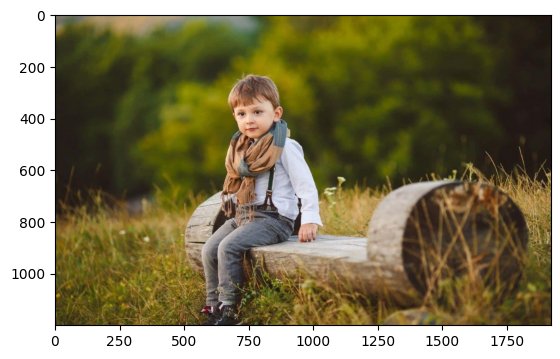

In [100]:
filename="image.jpg"
img=read_file(filename)
org_img=np.copy(img)

create edge mask


In [101]:
def edge_mask(img,line_size,blur_value):
  """input:imput  image
  output:edges of e=images"""
  gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  gray_blur=cv2.medianBlur(gray,blur_value)
  edges=cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,line_size,blur_value)
  return edges

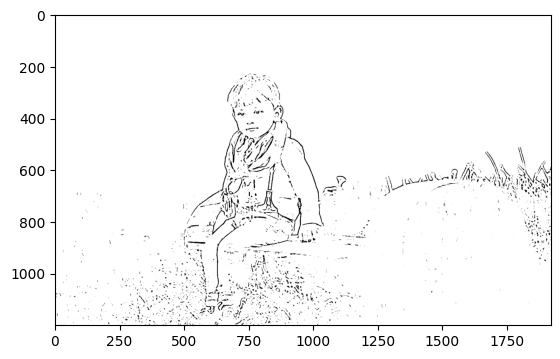

In [102]:
line_size,blur_value=7,7
edges=edge_mask(img,line_size,blur_value)
plt.imshow(edges,cmap="gray")
plt.show()




reduce the color palette

In [103]:
def color_quantization(img,k):
  #transform image
  data=np.float32(img).reshape((-1,3))
  #determine criteria
  criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,20,0.001 )
  #IMPLEMENTING KMEANS
  ret,label,center=cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
  center=np.uint8(center)
  result=center[label.flatten()]
  result=result.reshape(img.shape)
  return result

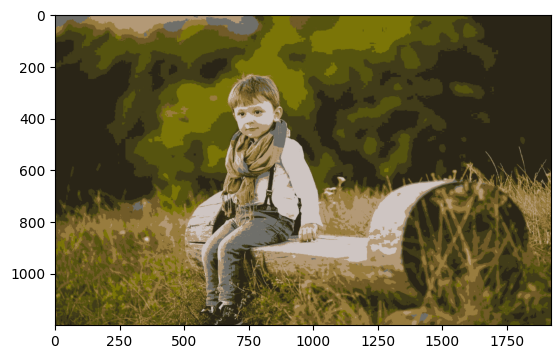

In [104]:
img=color_quantization(img,k=9)
plt.imshow(img)
plt.show()

reduce noise

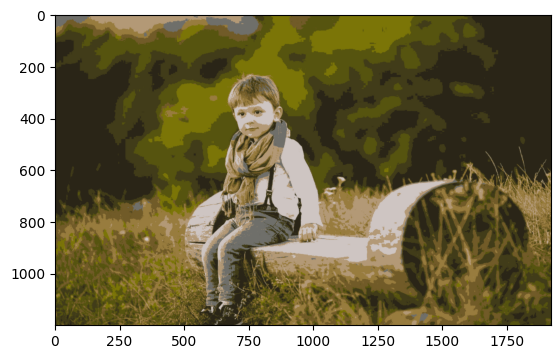

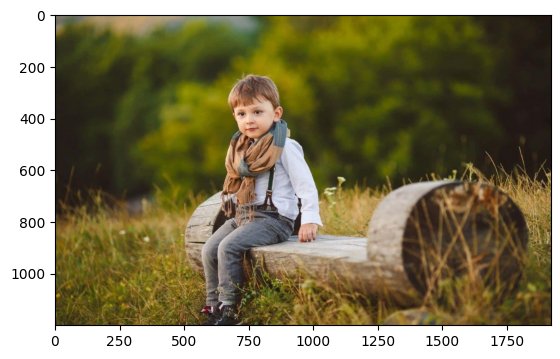

In [105]:
blurred=cv2.bilateralFilter(img,d=3,sigmaColor=200,sigmaSpace=200)
plt.imshow(blurred)
plt.show()
plt.imshow(org_img)
plt.show()


combine edge mask with quantized image

In [106]:
def cartoon():
  c=cv2.bitwise_and(blurred,blurred,mask=edges)
  plt.imshow(c)
  plt.show()


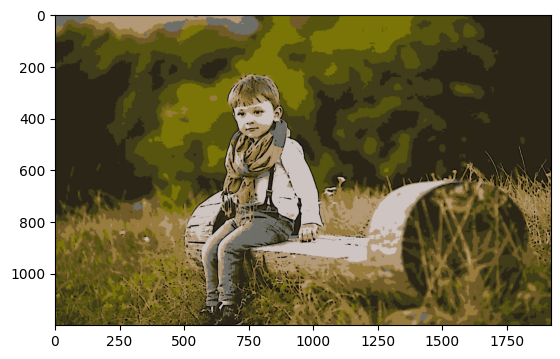

In [107]:
cartoon()
